In [1]:
from large_gcs.graph.cost_factory import create_l2norm_edge_cost, create_l2norm_squared_edge_cost
from large_gcs.example_graphs.utils.spp_shape_gcs_utils import generate_spp_shape_gcs, load_spp_shape_gcs, SppShapeGcsGeneratorParams
from large_gcs.algorithms.gcs_dijkstra import GcsDijkstra
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.search_algorithm import AlgVisParams
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import Video

## Configure Params

In [2]:
# params = SppShapeGcsGeneratorParams(should_save=True,
#                                     random_seed = 804454)

# 1000 Vertex example
# workspace_radius=100
# params = SppShapeGcsGeneratorParams(
#     n_sets=1000,
#     workspace=([-workspace_radius, workspace_radius], [-workspace_radius, workspace_radius]),
#     source=(0,0),
#     target=(workspace_radius * 0.7, workspace_radius * 0.7),
#     set_scale=1.2,
#     k_nearest_edges=(1,4),
#     k_nearest_pool=20,
#     random_seed=490052,
#     should_save=True,
# )

# 100 Vertex example
workspace_radius=25
target_scaling_factor = 0.2
params = SppShapeGcsGeneratorParams(
    n_sets=100,
    samples_workspace=([-workspace_radius, workspace_radius], [-workspace_radius, workspace_radius]),
    source=(0,0),
    target=(workspace_radius * target_scaling_factor, workspace_radius * target_scaling_factor),
    set_scale=1.2,
    k_nearest_edges=(3,8),
    k_nearest_pool=10,
    random_seed=490052,
    should_save=True,
)

In [3]:
base_file_name = f"spp_{params.dim}d_v{params.n_sets}_shape_gcs"
graph_file = os.path.join(os.environ['PROJECT_ROOT'], "large_gcs", "example_graphs",
                    base_file_name + ".npy")
params.save_path = graph_file

## Generate the graph

Sampling points uniformly within the workspace...
Processing samples into convex sets...


100%|██████████| 100/100 [00:00<00:00, 174.26it/s]


Calculating distance matrix...
Adding edges to vertices...


100%|██████████| 3/3 [00:00<00:00, 14648.33it/s]


Saving graph data...
Adding vertices and edges to graph...
Adding points as vertices to the graph...


100%|██████████| 2/2 [00:00<00:00, 8738.13it/s]


Adding ellipsoids as vertices to the graph...


100%|██████████| 54/54 [00:00<00:00, 16016.72it/s]


Adding polyhedra as vertices to the graph...


100%|██████████| 46/46 [00:00<00:00, 86.25it/s]


Adding edges to the graph...


100%|██████████| 101/101 [00:00<00:00, 18167.28it/s]


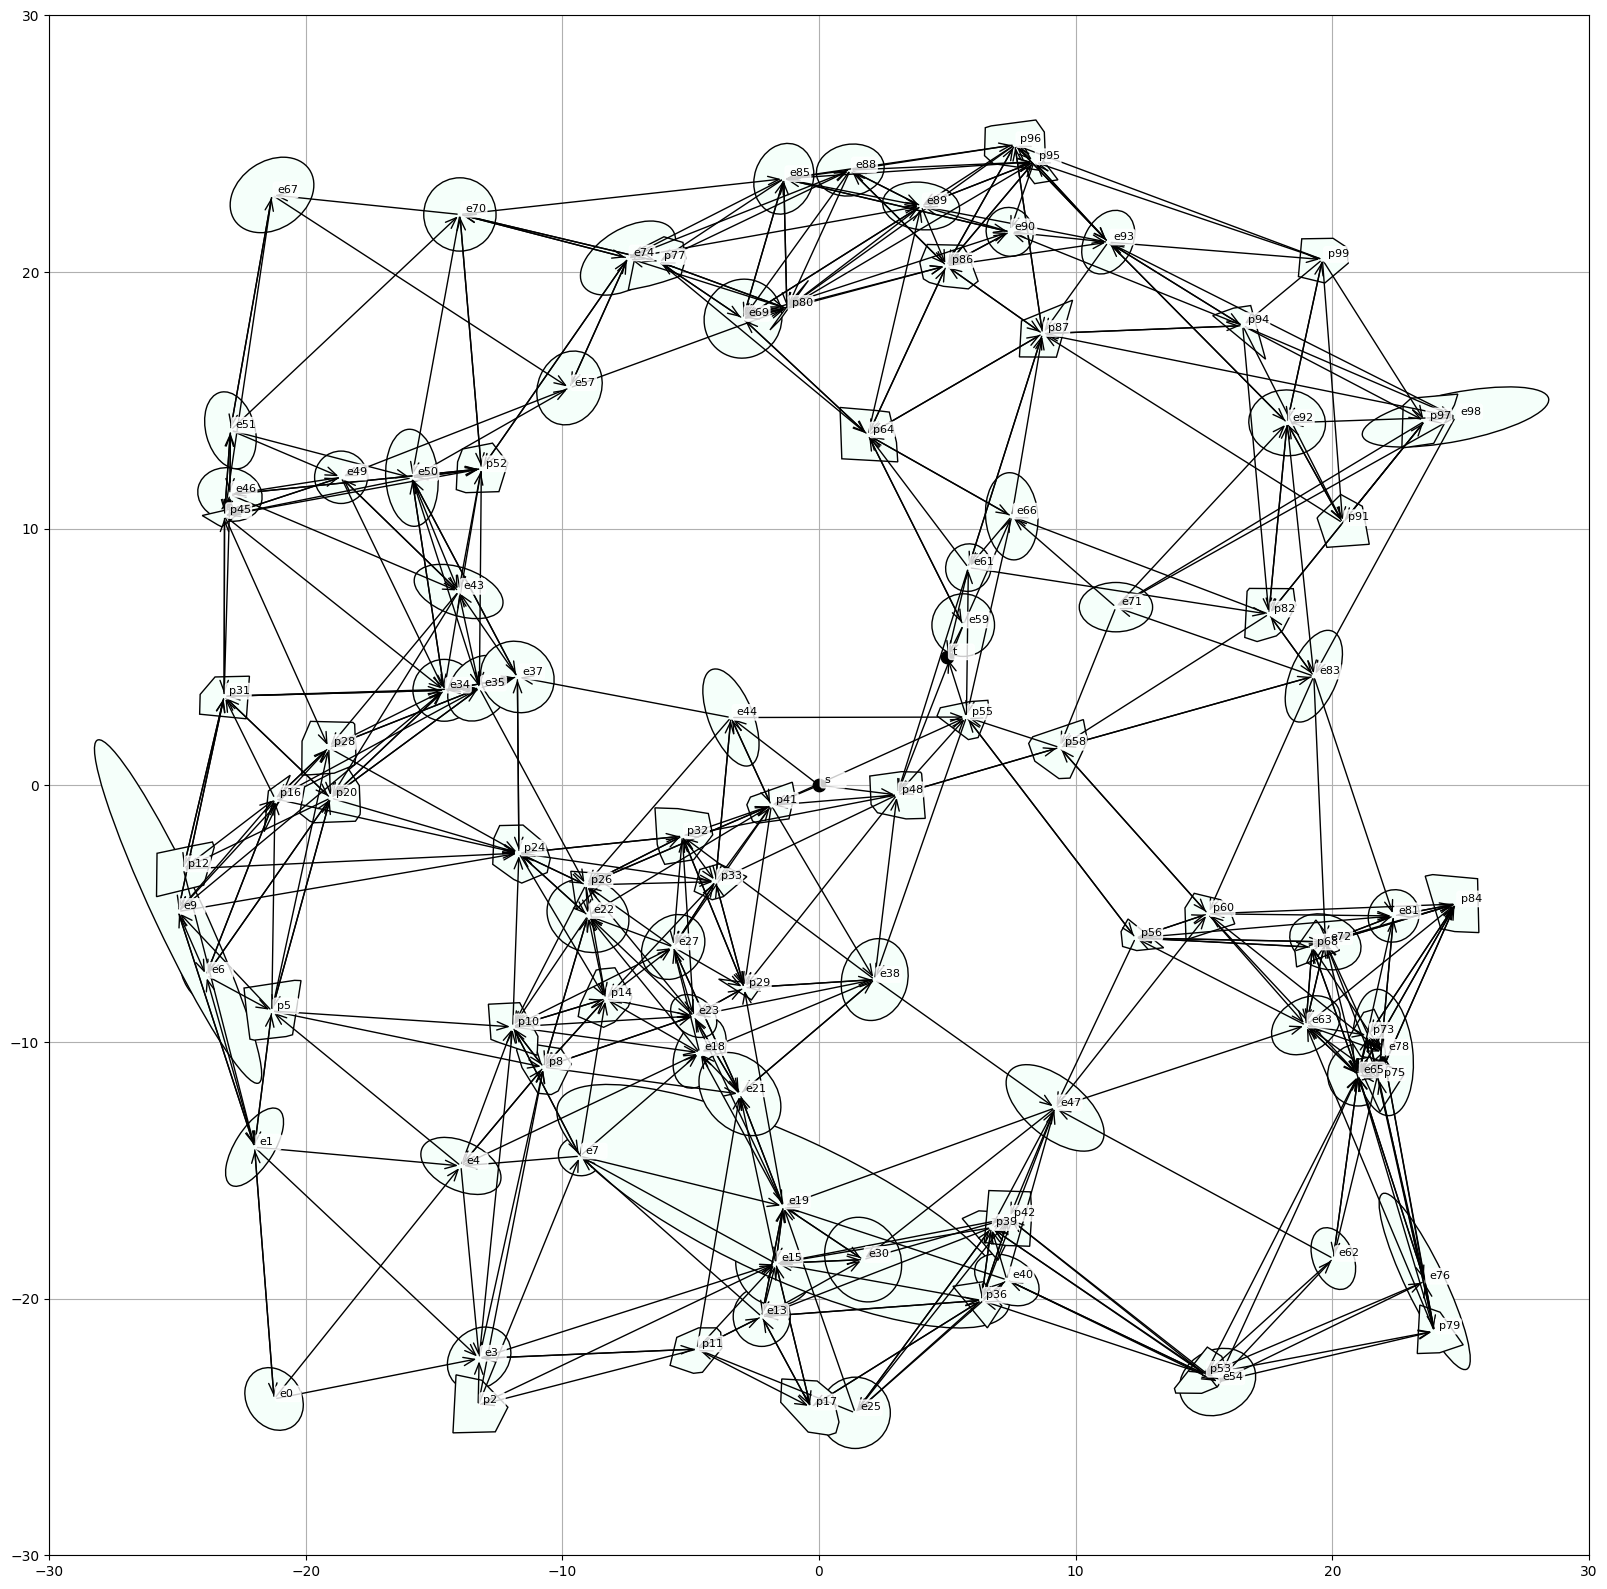

In [4]:
G = generate_spp_shape_gcs(params)

# draw convex sets and edges
plt.figure(figsize=(20,20))
G.plot_sets()
G.plot_edges()
G.plot_set_labels()
plt.grid()
plt.xlim(G.workspace[0])
plt.ylim(G.workspace[1])
plt.show()

## Standard GCS solve on entire graph

Adding points as vertices to the graph...


100%|██████████| 2/2 [00:00<00:00, 9436.00it/s]


Adding ellipsoids as vertices to the graph...


100%|██████████| 54/54 [00:00<00:00, 21533.79it/s]


Adding polyhedra as vertices to the graph...


100%|██████████| 46/46 [00:00<00:00, 77.90it/s]


Adding edges to the graph...


100%|██████████| 101/101 [00:00<00:00, 2964.30it/s]


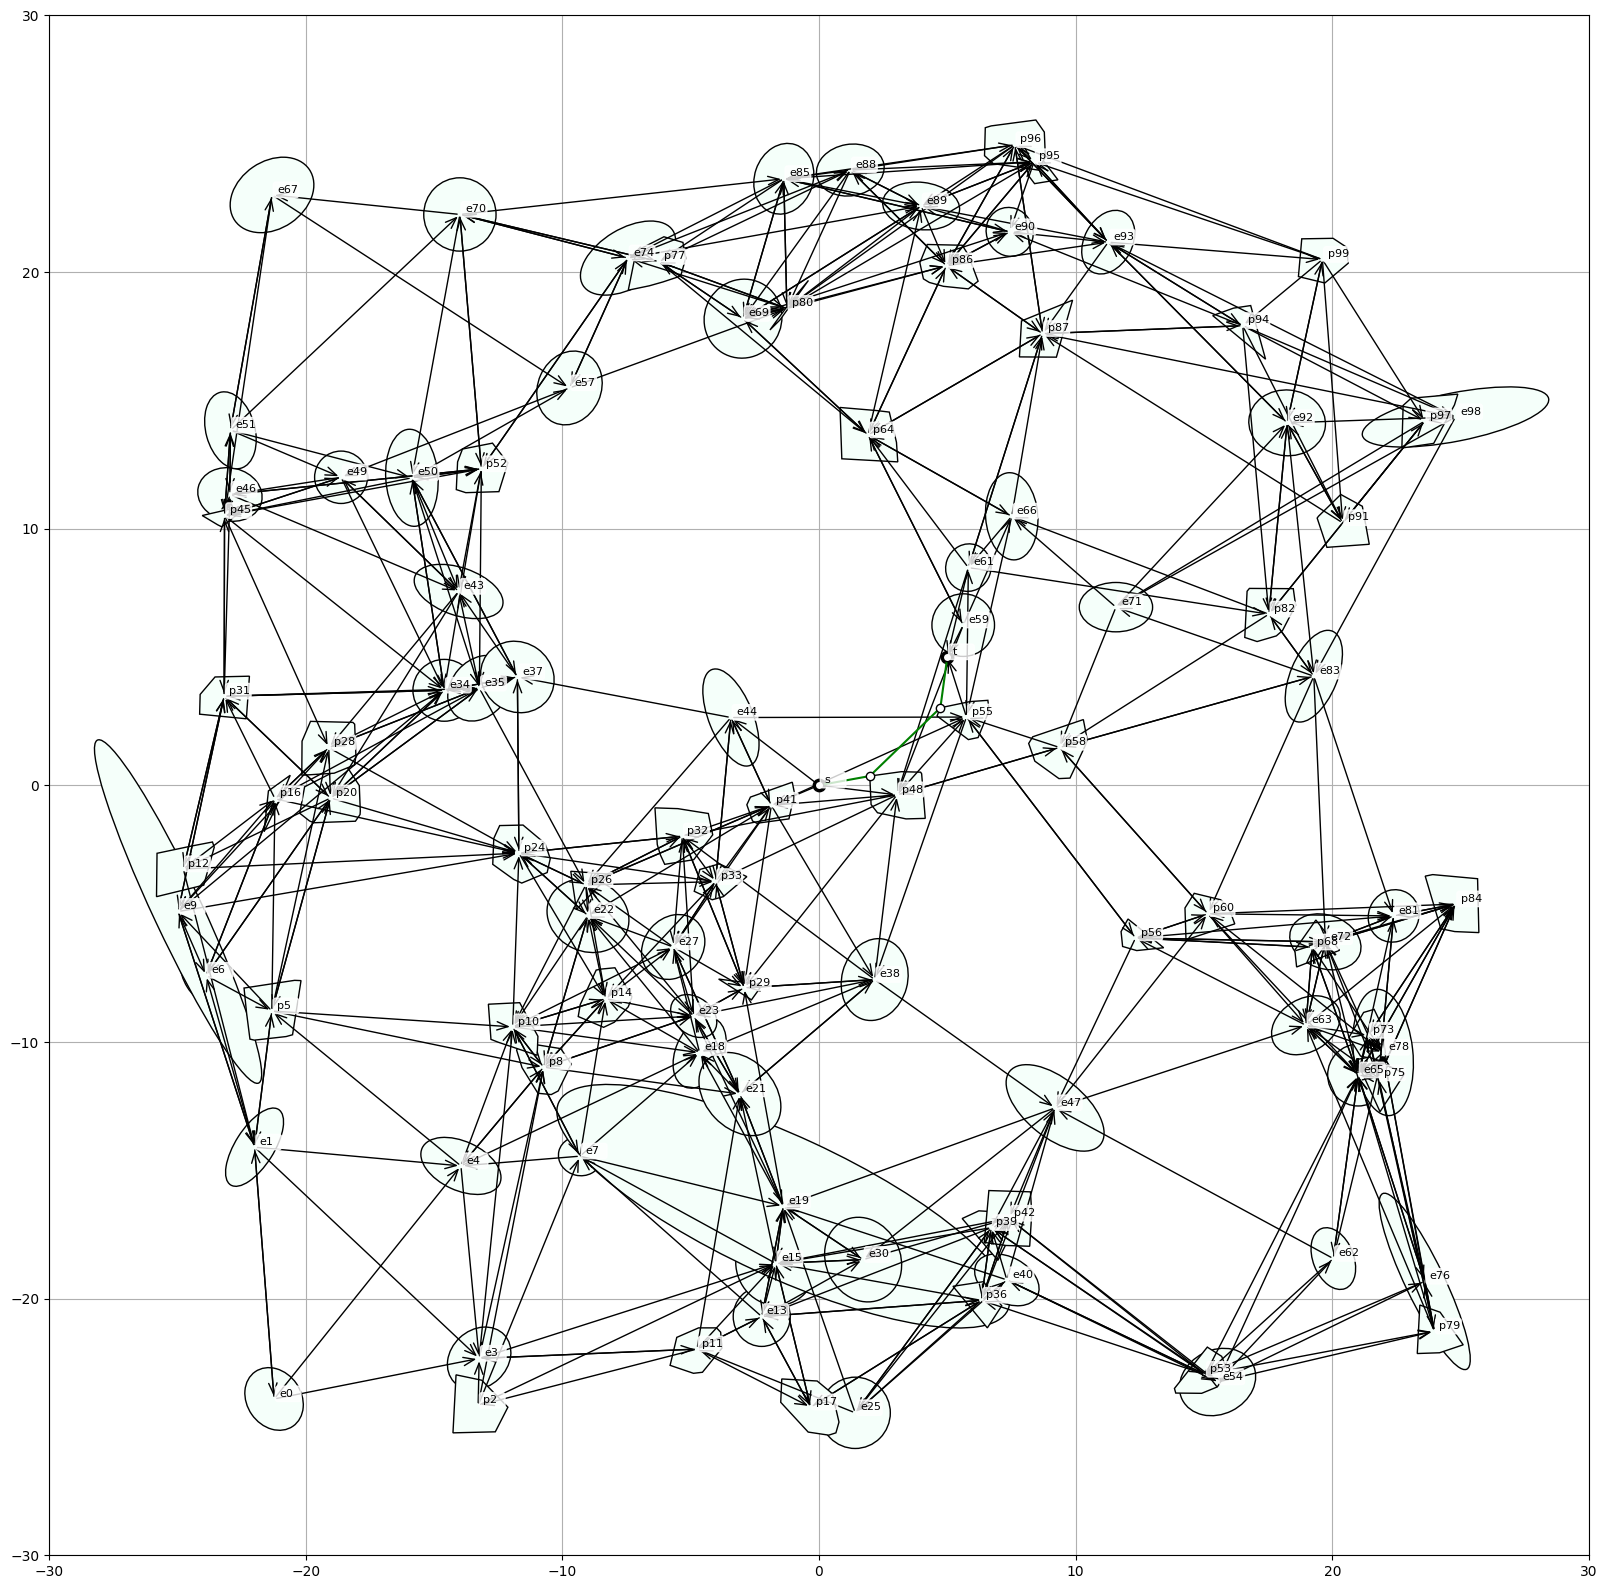

ShortestPathSolution(cost=7.836762495411424, time=1.9987340900115669, path=[('s', array([0., 0.])), ('p48', array([1.98, 0.36])), ('p55', array([4.73, 3.02])), ('t', array([5., 5.]))], flows=[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [5]:
G = load_spp_shape_gcs(graph_file, create_l2norm_edge_cost)
sol = G.solve_shortest_path()

# draw convex sets and edges
plt.figure(figsize=(20,20))
G.plot_sets()
G.plot_edges()
G.plot_set_labels()
G.plot_path(sol.path)
plt.grid()
plt.xlim(G.workspace[0])
plt.ylim(G.workspace[1])

plt.show()
print(sol)

## Verifying Params

In [ ]:
data = np.load(graph_file, allow_pickle=True).item()
print(data["params"])

## Running GCS Dijkstra on the graph

In [ ]:
gcs_dijk_vid_file = os.path.join(os.environ['PROJECT_ROOT'], "output", "gcs_dijkstra", f"gcs_dijkstra_{base_file_name}_l2norm.mp4")

In [ ]:
vis_params = AlgVisParams(output_path=gcs_dijk_vid_file,
                          fps=10,
                          figsize=(20,20),
                        )
gcs_dijk = GcsDijkstra(G, vis_params).run(animate=True)

In [ ]:
Video(gcs_dijk_vid_file)

## Running GCS A* on the graph

In [6]:
gcs_astar_vid_file = os.path.join(os.environ['PROJECT_ROOT'], "output", "gcs_astar", f"gcs_astar_{base_file_name}_l2norm.mp4")
vis_params = AlgVisParams(output_path=gcs_astar_vid_file,
                          fps=10,
                          figsize=(20,20),
                        )
gcs_astar = GcsAstar(G, vis_params).run(animate=True)

AlgMetrics(n_vertices_visited=9, n_edges_visited=20, vertex_coverage=0.09, edge_coverage=0.04, n_gcs_solves=31, gcs_solve_time_total=0.3892567064613104, gcs_solve_time_iter_mean=0.012556667950364852, gcs_solve_time_iter_std=0.008755980889663022, gcs_solve_time_iter_min=0.002081975806504488, gcs_solve_time_iter_max=0.029757101088762283), now relaxing node e38's neighbors


: 

: 

In [ ]:
Video(gcs_astar_vid_file)